In [2]:
pip install numpy matplotlib tensorflow


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [6]:
def generate_dataset(num_samples=10000):

    images = []
    labels = []

    for _ in range(num_samples):
        image = np.zeros((50, 50), dtype=np.float32)

        x = np.random.randint(0, 50)
        y = np.random.randint(0, 50)

        image[y, x] = 1.0  # normalized pixel value

        images.append(image)
        labels.append([x / 49.0, y / 49.0])  # normalize coordinates

    images = np.array(images).reshape(-1, 50, 50, 1)
    labels = np.array(labels)

    return images, labels


In [8]:
X, y = generate_dataset(10000)

X_train, X_val = X[:8000], X[8000:]
y_train, y_val = y[:8000], y[8000:]


In [10]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='linear')  # x and y output
])


C:\Users\varsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [14]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)


Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0533 - mae: 0.1442 - val_loss: 0.0017 - val_mae: 0.0273
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0012 - mae: 0.0231 - val_loss: 7.6172e-04 - val_mae: 0.0196
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 6.4894e-04 - mae: 0.0183 - val_loss: 4.0502e-04 - val_mae: 0.0150
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 4.2299e-04 - mae: 0.0153 - val_loss: 2.2541e-04 - val_mae: 0.0113
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 2.1310e-04 - mae: 0.0109 - val_loss: 1.5856e-04 - val_mae: 0.0096
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 2.1063e-04 - mae: 0.0110 - val_loss: 1.3624e-04 - val_mae: 0.0088
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.3419e-04 - mae: 0.0088 - val_loss: 2.1766e-04 - val_mae: 0.0112
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 1.9566e-04 - mae: 0.0105 - val_loss: 2.4089e-04 - val_mae:

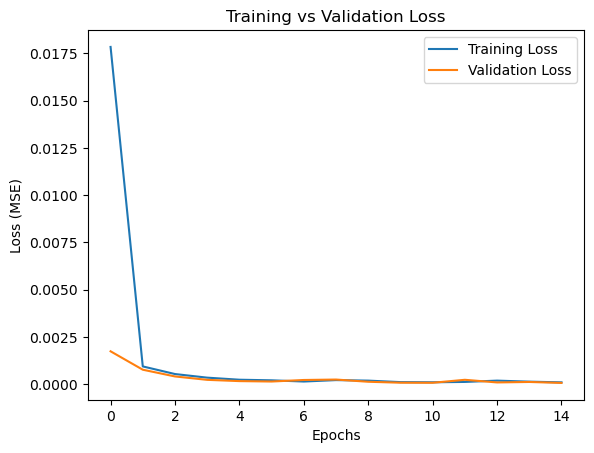

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [18]:
predictions = model.predict(X_val)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


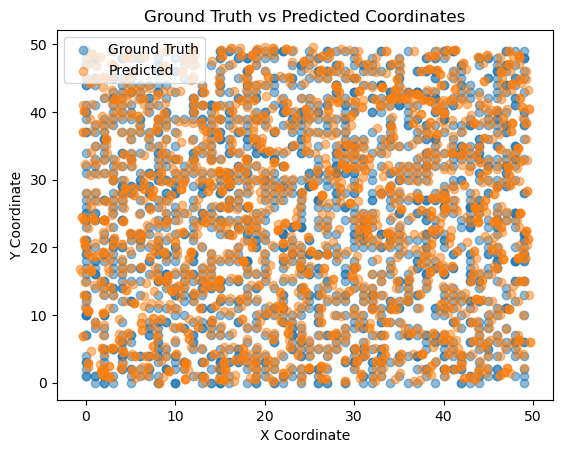

In [20]:
true_coords = y_val * 49
pred_coords = predictions * 49

plt.scatter(true_coords[:, 0], true_coords[:, 1], label='Ground Truth', alpha=0.5)
plt.scatter(pred_coords[:, 0], pred_coords[:, 1], label='Predicted', alpha=0.5)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.title('Ground Truth vs Predicted Coordinates')
plt.show()


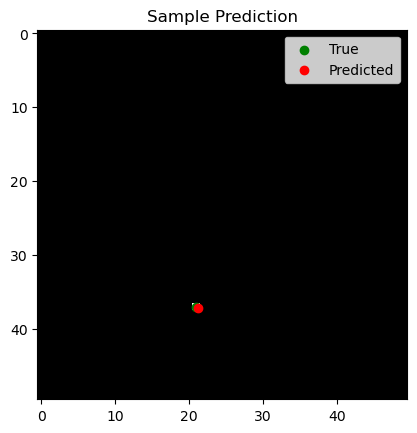

In [22]:
index = np.random.randint(0, len(X_val))

image = X_val[index].reshape(50, 50)
true_x, true_y = true_coords[index]
pred_x, pred_y = pred_coords[index]

plt.imshow(image, cmap='gray')
plt.scatter(true_x, true_y, c='green', label='True')
plt.scatter(pred_x, pred_y, c='red', label='Predicted')
plt.legend()
plt.title('Sample Prediction')
plt.show()
